In [1]:
#data preprocessing
import pandas as pd
#math operations
import numpy as np
#machine learning
 
from sklearn.preprocessing import StandardScaler
#hyperparameter optimization
from sklearn.model_selection import GridSearchCV
#support vector machine model
from keras import regularizers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,Activation
            
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import random
import tensorflow as tf

In [ ]:
data=[]
labels=[]
Parasitized=os.listdir("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [ ]:
Cells=np.array(data)
labels=np.array(labels)

In [ ]:
np.save("/content/drive/My Drive/Colab Notebooks/Cells1",Cells)
np.save("/content/drive/My Drive/Colab Notebooks/labels1",labels)

In [2]:
Cells=np.load("/content/drive/My Drive/Colab Notebooks/Cells64.npy")
labels=np.load("/content/drive/My Drive/Colab Notebooks/labels64.npy")

In [3]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [4]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [5]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [6]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [7]:
#Doing One hot encoding as classifier has multiple classes
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [8]:
# initialzie the model
model = Sequential()
inputShape = (64, 64, 3)
 
model.add(Conv2D(32, kernel_size=(3,3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(MaxPooling2D(pool_size=2))
 
model.add(Flatten())
model.add(Dense(4000))
model.add(Dense(2))
model.add(Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 4000)              32772000  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 8

In [9]:
# Compiling model
# compile the model with loss as categorical_crossentropy and using adam optimizer you can test result by trying RMSProp as well as Momentum
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics=['accuracy'])

In [10]:
# Fit the model
history = model.fit(x = x_train, y = y_train,
                    epochs = 20, validation_data = (x_test,y_test),
                    verbose = 1)

Epoch 1/20
776/776 [==============================] - 14s 10ms/step - loss: 1.5555 - accuracy: 0.6656 - val_loss: 0.3389 - val_accuracy: 0.8715
Epoch 2/20
776/776 [==============================] - 8s 10ms/step - loss: 0.3674 - accuracy: 0.8780 - val_loss: 0.3196 - val_accuracy: 0.8936
Epoch 3/20
776/776 [==============================] - 8s 10ms/step - loss: 0.3328 - accuracy: 0.8968 - val_loss: 0.4612 - val_accuracy: 0.9201
Epoch 4/20
776/776 [==============================] - 8s 10ms/step - loss: 0.3264 - accuracy: 0.9042 - val_loss: 0.3374 - val_accuracy: 0.8726
Epoch 5/20
776/776 [==============================] - 8s 10ms/step - loss: 0.3207 - accuracy: 0.9040 - val_loss: 0.3074 - val_accuracy: 0.8951
Epoch 6/20
776/776 [==============================] - 8s 10ms/step - loss: 0.3255 - accuracy: 0.9021 - val_loss: 0.2982 - val_accuracy: 0.9114
Epoch 7/20
776/776 [==============================] - 8s 10ms/step - loss: 0.3069 - accuracy: 0.9062 - val_loss: 0.3289 - val_accuracy: 0.894

In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/Shallownet64/PKLShallowNet64.h5")

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [11]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

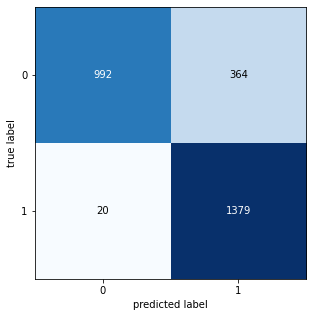

In [12]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()